In [100]:
import bz2
import json
import pandas as pd
from collections import OrderedDict
from operator import itemgetter
from textblob import TextBlob
import matplotlib.pyplot as plt
import re


In [101]:
Strings = []

with bz2.open('RC_2005-12.bz2') as f:
    for line in f:
        line_ = json.loads(line)
        del line_['controversiality'], line_['subreddit_id'], line_['link_id'], line_['stickied'], line_['subreddit'], \
line_['parent_id'], line_['gilded'], line_['distinguished'], line_['retrieved_on'], line_['score'], line_['ups'],\
        line_['author_flair_css_class'], line_['author_flair_text'], line_['id'], line_['edited'], line_['created_utc']
        Strings.append(line_)

In [102]:
Strings

[{'body': 'A look at Vietnam and Mexico exposes the myth of market liberalisation.',
  'author': 'frjo'},
 {'body': 'The site states "What can I use it for? Meeting notes, Reports, technical specs Sign-up sheets, proposals and much more...", just like any other new breeed of sites that want us to store everything we have on the web. And they even guarantee multiple levels of security and encryption etc. But what prevents these web site operators fom accessing and/or stealing Meeting notes, Reports, technical specs Sign-up sheets, proposals and much more, for competitive or personal gains...? I am pretty sure that most of them are honest, but what\'s there to prevent me from setting up a good useful site and stealing all your data? Call me paranoid - I am.',
  'author': 'zse7zse'},
 {'author': '[deleted]', 'body': 'Jython related topics by Frank Wierzbicki'},
 {'author': '[deleted]', 'body': '[deleted]'},
 {'author': 'rjoseph',
  'body': 'Saft is by far the best extension you could tak 

In [103]:
for i in range(len(Strings)):
    Strings[i]['body'] = Strings[i]['body'].replace('"','')
    Strings[i]['body'] = Strings[i]['body'].replace('-','')
    Strings[i]['body'] = Strings[i]['body'].replace('_','')
    Strings[i]['body'] = Strings[i]['body'].replace('!','')
    Strings[i]['body'] = Strings[i]['body'].replace('@','')
    Strings[i]['body'] = Strings[i]['body'].replace('#','')
    Strings[i]['body'] = Strings[i]['body'].replace('$','')
    Strings[i]['body'] = Strings[i]['body'].replace(',','')
    Strings[i]['body'] = Strings[i]['body'].replace(';','')
    Strings[i]['body'] = Strings[i]['body'].replace(':','')
    Strings[i]['body'] = Strings[i]['body'].replace('.','')
    Strings[i]['body'] = Strings[i]['body'].replace('[','')
    Strings[i]['body'] = Strings[i]['body'].replace(']','')
    Strings[i]['body'] = Strings[i]['body'].replace('(','')
    Strings[i]['body'] = Strings[i]['body'].replace(')','')
    Strings[i]['body'] = Strings[i]['body'].replace('&','')
    Strings[i]['body'] = Strings[i]['body'].replace('*','')
    Strings[i]['body'] = Strings[i]['body'].replace('=','')
    Strings[i]['body'] = Strings[i]['body'].replace('+','')
    Strings[i]['body'] = Strings[i]['body'].replace('%','')
    Strings[i]['body'] = Strings[i]['body'].replace('/','')
    Strings[i]['body'] = Strings[i]['body'].replace(r'\'','')
    Strings[i]['body'] = Strings[i]['body'].replace('|','')
    Strings[i]['body'] = Strings[i]['body'].replace('~','')
    Strings[i]['body'] = Strings[i]['body'].replace('?','')
    Strings[i]['body'] = Strings[i]['body'].replace('>','')
    Strings[i]['body'] = Strings[i]['body'].replace('<','')
    Strings[i]['body'] = Strings[i]['body'].replace('{','')
    Strings[i]['body'] = Strings[i]['body'].replace('}','')
    

In [104]:
Strings[1]['body']

"The site states What can I use it for Meeting notes Reports technical specs Signup sheets proposals and much more just like any other new breeed of sites that want us to store everything we have on the web And they even guarantee multiple levels of security and encryption etc But what prevents these web site operators fom accessing andor stealing Meeting notes Reports technical specs Signup sheets proposals and much more for competitive or personal gains I am pretty sure that most of them are honest but what's there to prevent me from setting up a good useful site and stealing all your data Call me paranoid  I am"

In [105]:
df = pd.DataFrame(Strings)

In [106]:
df

,body,author
0,A look at Vietnam and Mexico exposes the myth ...,frjo
1,The site states What can I use it for Meeting ...,zse7zse
2,Jython related topics by Frank Wierzbicki,[deleted]
3,deleted,[deleted]
4,Saft is by far the best extension you could ta...,rjoseph
...,...,...
1070,I've noticed that real sysadmins bitch about D...,[deleted]
1071,The fur's flying between Microsoft and IBM Lot...,chen
1072,It may be old but it was discussed for an hour...,chefranden
1073,Yes and it looks like they had good reason not...,lupin_sansei


In [107]:
df.groupby('author')['body'].nunique()

author
AJTSheppard       1
AaronSw           5
Angelo            1
AtlanticBlue99    3
BJThunderstone    4
                 ..
zlayde            1
zlotnik           2
zolo              1
zse7zse           1
zzztimbo          2
Name: body, Length: 394, dtype: int64

In [108]:
Comments = list(df.groupby('author')['body'])

In [109]:
df1 = pd.DataFrame(Comments)

In [110]:
df1.columns = ['Author','Comment']

In [111]:
df1
    

,Author,Comment
0,AJTSheppard,474 I'd like to make 3 points about Paul's ...
1,AaronSw,17 It's a New York Times editorial that was...
2,Angelo,912 Interesting commentary on current trend...
3,AtlanticBlue99,709 A fast stylish and powerful Mustang des...
4,BJThunderstone,437 I am a successful entrepreneur and I wa...
...,...,...
389,zlayde,24 Interesting article on the use of open s...
390,zlotnik,347 Ruby is a remarkably slow language This...
391,zolo,"242 whoops sorry Name: body, dtype: object"
392,zse7zse,1 The site states What can I use it for Mee...


In [113]:
df1

,Author,Comment
0,AJTSheppard,474 I'd like to make 3 points about Paul's ...
1,AaronSw,17 It's a New York Times editorial that was...
2,Angelo,912 Interesting commentary on current trend...
3,AtlanticBlue99,709 A fast stylish and powerful Mustang des...
4,BJThunderstone,437 I am a successful entrepreneur and I wa...
...,...,...
389,zlayde,24 Interesting article on the use of open s...
390,zlotnik,347 Ruby is a remarkably slow language This...
391,zolo,"242 whoops sorry Name: body, dtype: object"
392,zse7zse,1 The site states What can I use it for Mee...


In [114]:
df1 = df1[:11]

In [115]:
df1

,Author,Comment
0,AJTSheppard,474 I'd like to make 3 points about Paul's ...
1,AaronSw,17 It's a New York Times editorial that was...
2,Angelo,912 Interesting commentary on current trend...
3,AtlanticBlue99,709 A fast stylish and powerful Mustang des...
4,BJThunderstone,437 I am a successful entrepreneur and I wa...
5,BioGeek,150 This rationale was spelled out in a mem...
6,ChadRLarson,879 You can tighten the angle once you get ...
7,DanTilkin,318 No that's when the day would have cycle...
8,DonXML,657 Glad to see someone thought my post was...
9,Donut,613 Most colleges do not expect the underg...


In [139]:
Countw = []
Uniqw = []
Autor = list(df1['Author'])

for i in range(len(df1)):
    v = TextBlob(str(df1['Comment'][i]))
    v.correct()
    for k in range(len(v.sentences)):
        for word in v.sentences[k].words:
            word.lemmatize()
    countw = len(v.split())
    Countw.append(countw)
    uniqw = len(list(set(v.split())))
    Uniqw.append(uniqw)
    
    

In [140]:
Result = pd.DataFrame({'Author':Autor,'Countw':Countw,'Uniqw':Uniqw})

In [141]:
Result

,Author,Countw,Uniqw
0,AJTSheppard,14,14
1,AaronSw,46,42
2,Angelo,12,12
3,AtlanticBlue99,25,24
4,BJThunderstone,45,40
5,BioGeek,23,23
6,ChadRLarson,15,15
7,DanTilkin,14,14
8,DonXML,15,15
9,Donut,22,20


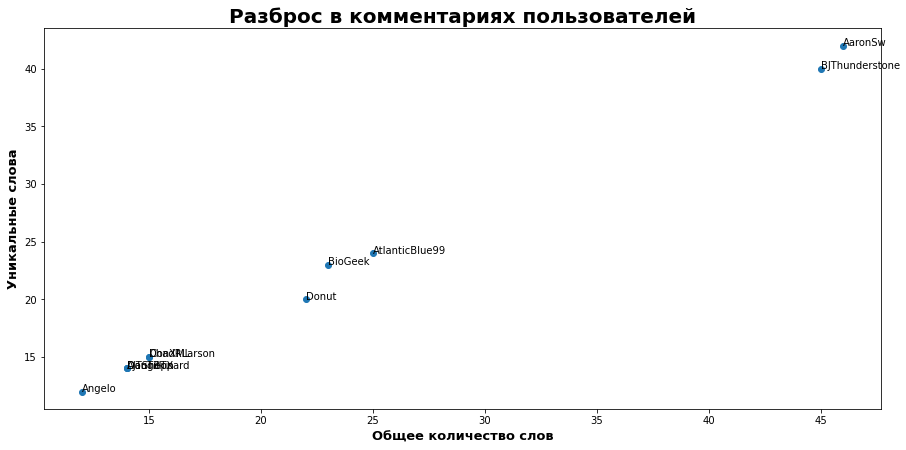

In [145]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plt.title('Разброс в комментариях пользователей', fontsize=20, fontweight = 'bold')
plt.ylabel('Уникальные слова', fontsize=13, fontweight = 'bold')
plt.xlabel('Общее количество слов', fontsize=13, fontweight = 'bold')
ax.scatter(Countw, Uniqw) 
for i, k in enumerate(Result['Author']):
    ax.annotate(k, (Result['Countw'][i], Result ['Uniqw'][i]), fontsize=10)